## Book 4: Exploratory Data Analysis
- Mason Middleton

In [2]:
#Import libraries used for exploratory data analysis
import numpy as np 
import seaborn as sns
import pandas as pd  
import itertools
from matplotlib import pyplot as plt

data = pd.DataFrame()
data = pd.read_csv('archive.zip')

In [23]:
#Check data types and find shape of the data
print("Check each column for null values and check its type:")
print(clean_data.info())
print("----------------------------------------")
print("The shape of the data:")
print(clean_data.shape)

Check each column for null values and check its type:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1741 entries, 0 to 3476
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            1741 non-null   float64
 1   index_nsa       1741 non-null   float64
 2   Population      1741 non-null   float64
 3   Violent Crimes  1741 non-null   float64
 4   Homicides       1741 non-null   float64
 5   Rapes           1741 non-null   float64
 6   Assaults        1741 non-null   float64
 7   Robberies       1741 non-null   float64
 8   City            1741 non-null   object 
 9   State           1741 non-null   object 
dtypes: float64(8), object(2)
memory usage: 149.6+ KB
None
----------------------------------------
The shape of the data:
(1741, 10)


Descriptive statistics:


,count,mean,std,min,25%,50%,75%,max
Year,1741.0,1995.705916,11.439180,1975.000,1986.00,1996.000000,2006.00,2.015000e+03
index_nsa,1741.0,125.694362,62.628859,20.385,75.43,110.024167,168.09,3.862119e+02
Population,1741.0,619193.616887,495514.807190,112994.000,359749.00,470970.000000,654626.00,3.150000e+06
Violent Crimes,1741.0,7743.536473,8722.677288,385.000,3267.00,5119.000000,8926.00,9.052000e+04
Homicides,1741.0,114.098219,142.332915,1.000,35.00,62.000000,122.00,9.600000e+02
Rapes,1741.0,409.725445,401.994621,34.000,196.00,298.000000,481.00,3.754000e+03
Assaults,1741.0,3829.750718,4307.053175,264.000,1630.00,2588.000000,4507.00,4.223700e+04
Robberies,1741.0,3390.219414,4170.819090,83.000,1117.00,2106.000000,3757.00,4.378300e+04


----------------------------------------


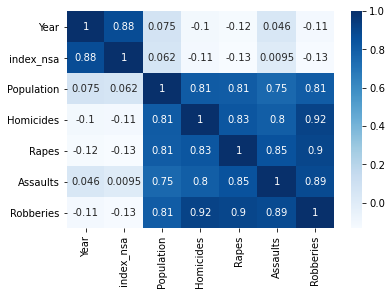

In [33]:
#Obtain descriptive stats and correlation table/matrix
print("Descriptive statistics:")
display(clean_data.describe().transpose())
print("----------------------------------------")
#For the correlation matrix we are leaving out the column "VIolent Crimes" since this is a running total of the other 4 crime columns.
sns.heatmap(clean_data[['Year','index_nsa','Population','Homicides','Rapes','Assaults','Robberies']].corr(), annot= True, cmap= 'Blues')
plt.show()

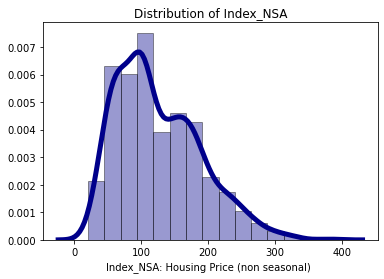

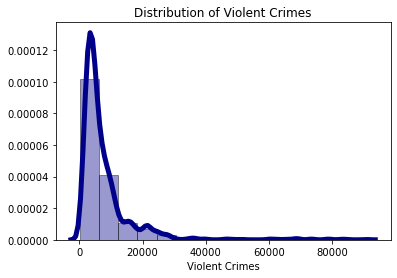

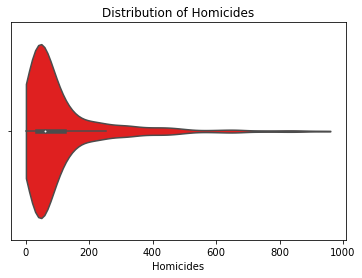

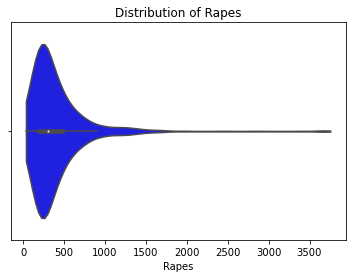

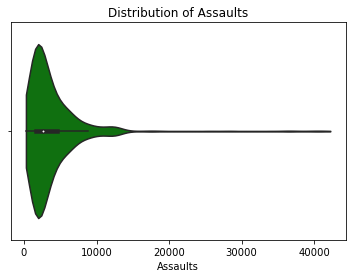

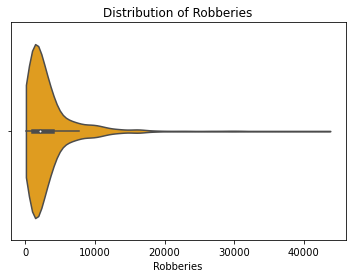

In [7]:
#Univariate Analysis (Single variable graphs)
#Density plots: Display distribution of the variable 'index_nsa' & 'Violent Crimes'
plot1= sns.distplot(clean_data['index_nsa'], hist= True, 
             kde= True, bins= int(15), color= 'darkblue', 
             hist_kws= {'edgecolor': 'black'}, kde_kws= {'linewidth': 5},
            axlabel= 'Index_NSA: Housing Price (non seasonal) ')
plot1.set(title= 'Distribution of Index_NSA')
plt.show()

plot2= sns.distplot(clean_data['Violent Crimes'], hist= True, 
             kde= True, bins= int(15), color= 'darkblue', 
             hist_kws= {'edgecolor': 'black'}, kde_kws= {'linewidth': 5})
plot2.set(title= 'Distribution of Violent Crimes')
plt.show()

#Violin plots: Display the distribution of different types of violent crimes
VP1= sns.violinplot(x= 'Homicides', data= clean_data, color= 'red', cut=0)
VP1.set(title= 'Distribution of Homicides')
plt.show()

VP2= sns.violinplot(x= 'Rapes', data= clean_data, color= 'blue', cut=0)
VP2.set(title= 'Distribution of Rapes')
plt.show()

VP3= sns.violinplot(x= 'Assaults', data= clean_data, color= 'green', cut=0)
VP3.set(title= 'Distribution of Assaults')
plt.show()

VP4= sns.violinplot(x= 'Robberies', data= clean_data, color= 'orange', cut=0)
VP4.set(title= 'Distribution of Robberies')
plt.show()

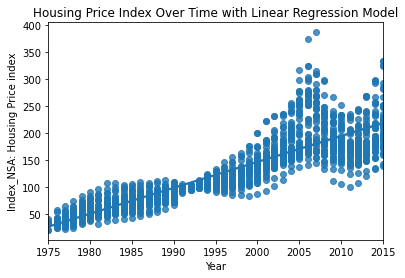

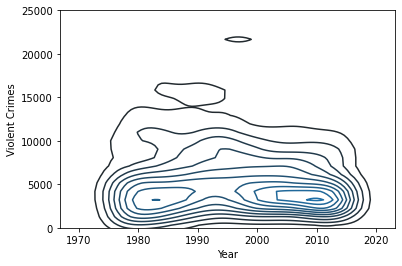

In [35]:
#Bivariate Analysis
#scatter w/ linear regression: 
SP= sns.regplot(clean_data['Year'], clean_data['index_nsa'], scatter= True, fit_reg= True, marker= 'o')
SP.set(title= 'Housing Price Index Over Time with Linear Regression Model', ylabel= 'Index_NSA: Housing Price index')
plt.show()

#kernel density estimate: year/Violent crimes
KDE= sns.kdeplot(clean_data['Year'], clean_data['Violent Crimes'])
KDE.set_ylim(0, 25000)
plt.show()

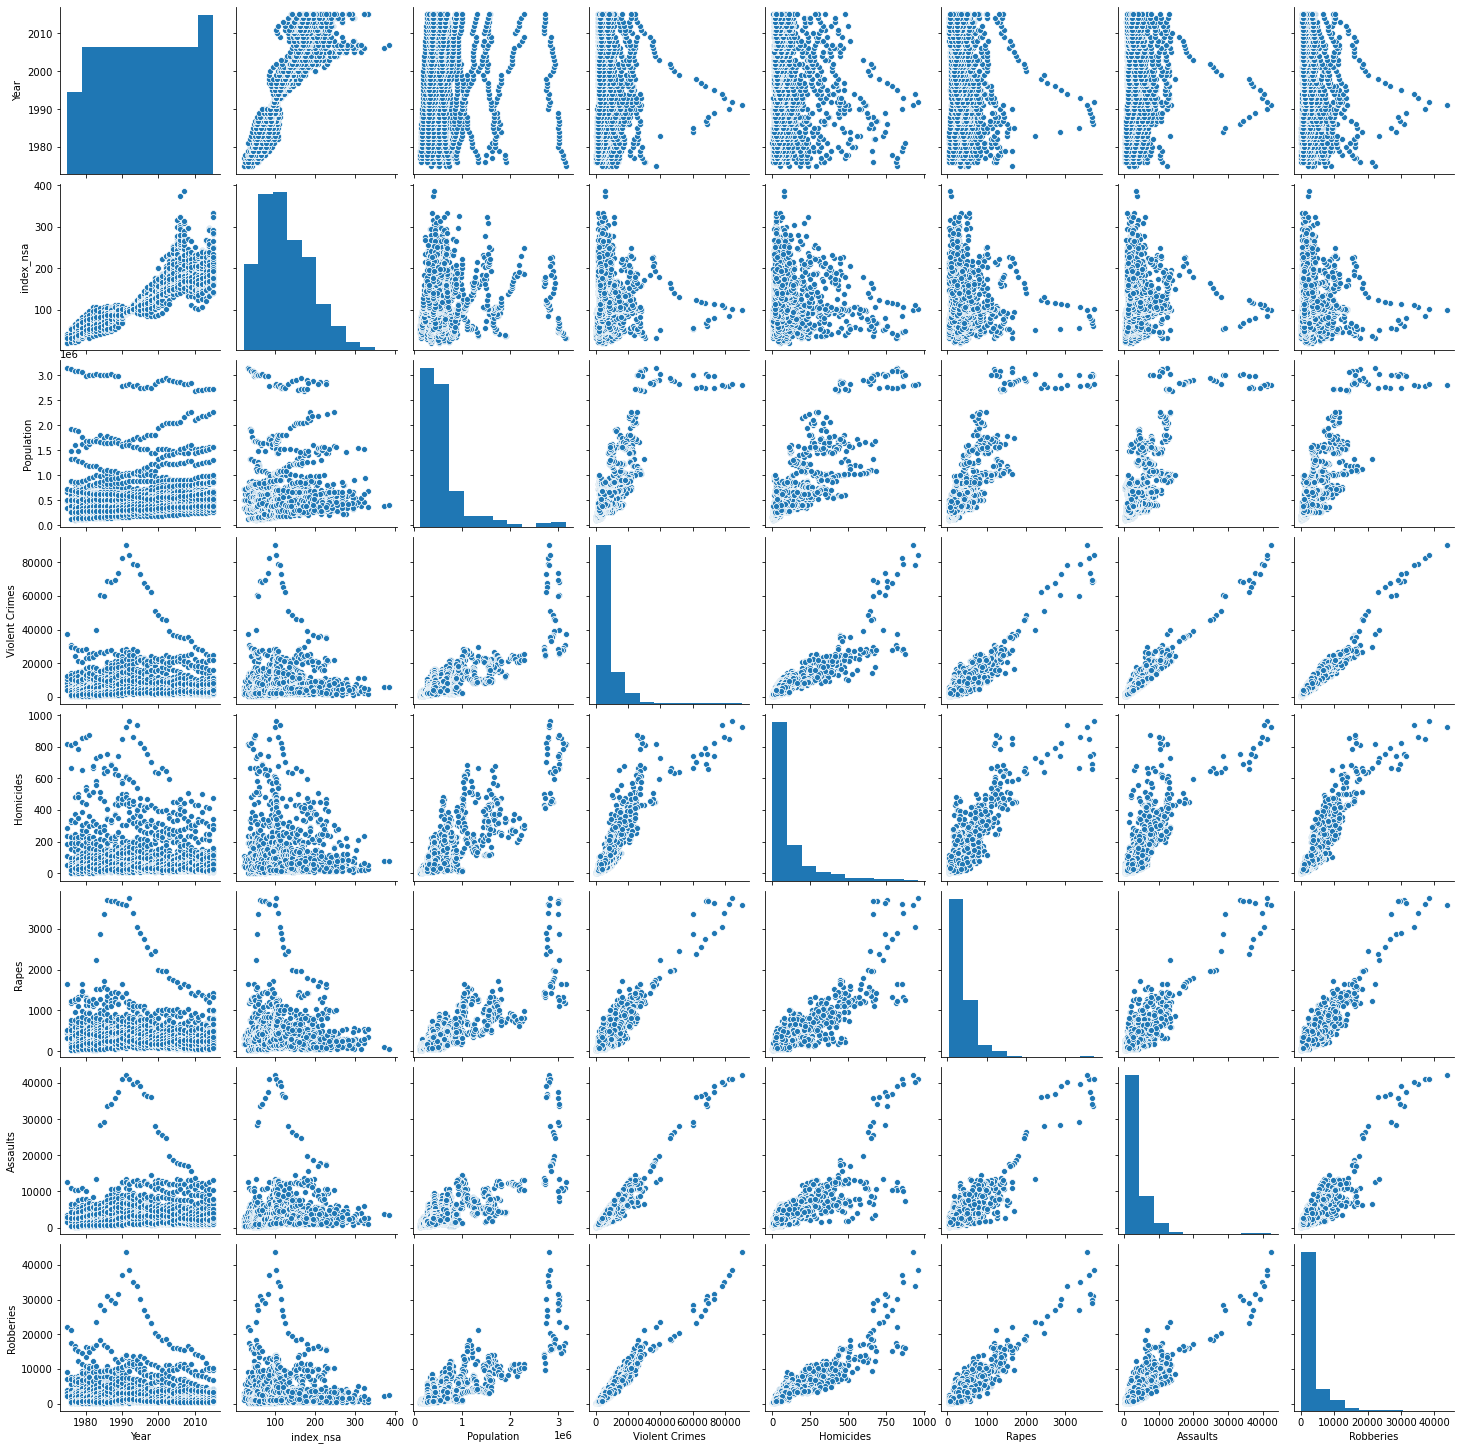

C:\Users\middl\anaconda3\lib\site-packages\matplotlib\collections.py:988: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


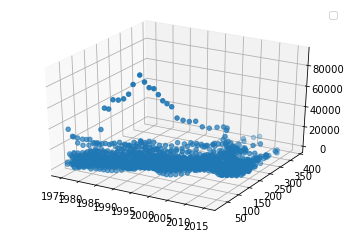

In [48]:
from matplotlib.colors import ListedColormap

#Pair plot
sns.pairplot(clean_data)
plt.show()

#3d plot: Year/index_nsa/Violent Crimes
fig= plt.figure()
ax= fig.gca(projection= '3d')
sc= ax.scatter(clean_data['Year'], clean_data['index_nsa'], clean_data['Violent Crimes'])
plt.legend(*sc.legend_elements())
plt.show()